<a href="https://colab.research.google.com/github/yumehara/hackday_2022/blob/main/notebooks/education_expenditure_in_Tokyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 東京23区の教育費・民生費の分析

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q japanize-matplotlib

import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [3]:
DIR_NAME = '/content/drive/MyDrive/hackday/'

## 市区町村ごとの歳出データ

In [4]:
df_spending = pd.read_csv(os.path.join(DIR_NAME, 'spending.csv'))
print(df_spending.shape)

(22525715, 12)


In [5]:
df_spending.head()

,決算年度,業務コード,団体コード,県名,団体名,団体区分,表番号,表名称,行番号,行名称,費目,金額
0,2020,61,11002,北海道,札幌市,1.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,1435416
1,2020,61,12025,北海道,函館市,8.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,410054
2,2020,61,12033,北海道,小樽市,3.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,313047
3,2020,61,12041,北海道,旭川市,8.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,523095
4,2020,61,12050,北海道,室蘭市,4.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,234929


In [6]:
df_spending['決算年度'].unique()

array([2020, 2019])

In [7]:
df_tokyo_23_wards = df_spending[
    (df_spending['決算年度'] == 2020)&
    (df_spending['県名'] == '東京都')&
    (df_spending['団体名'].str.contains('区'))&
    (~df_spending['団体名'].str.contains('組合', na=False))
]
print(df_tokyo_23_wards.shape)
assert len(df_tokyo_23_wards['団体名'].unique()) == 23

(82961, 12)


In [8]:
df_tokyo_23_wards.head()

,決算年度,業務コード,団体コード,県名,団体名,団体区分,表番号,表名称,行番号,行名称,費目,金額
1013,2020,61,131016,東京都,千代田区,2.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,484878
1014,2020,61,131024,東京都,中央区,2.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,539763
1015,2020,61,131032,東京都,港区,2.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,591503
1016,2020,61,131041,東京都,新宿区,2.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,641938
1017,2020,61,131059,東京都,文京区,2.0,7,歳出内訳及び財源内訳（その1）,1,人件費,001:議会費,546606


In [9]:
sorted(df_tokyo_23_wards['費目'].unique())

['001:労働費・総額',
 '001:土木費・総額',
 '001:歳出合計',
 '001:民生費・総額',
 '001:消防費',
 '001:災害復旧費・総額',
 '001:議会費',
 '002:労働費・失業対策費',
 '002:国庫支出金',
 '002:土木費・土木管理費',
 '002:教育費・総額',
 '002:民生費・社会福祉費',
 '002:災害復旧費・農林水産施設・総額',
 '002:総務費・総額',
 '003:労働費・労働諸費',
 '003:土木費・道路橋りょう費',
 '003:教育費・教育総務費',
 '003:民生費・老人福祉費',
 '003:災害復旧費・農林水産施設・農地',
 '003:総務費・総務管理費',
 '003:都道府県支出金',
 '004:使用料手数料',
 '004:土木費・河川費',
 '004:教育費・小学校費',
 '004:民生費・児童福祉費',
 '004:災害復旧費・農林水産施設・農業用施設',
 '004:総務費・徴税費',
 '004:農林水産業費・総額',
 '005:分担金負担金寄附金',
 '005:土木費・港湾費',
 '005:教育費・中学校費',
 '005:民生費・生活保護費',
 '005:災害復旧費・農林水産施設・林業用施設',
 '005:総務費・戸籍・住民基本台帳費',
 '005:農林水産業費・農業費',
 '006:土木費・都市計画費・街路費',
 '006:教育費・高等学校費',
 '006:民生費・災害救助費',
 '006:災害復旧費・農林水産施設・漁業用施設',
 '006:総務費・選挙費',
 '006:財産収入',
 '006:農林水産業費・畜産業費',
 '007:土木費・都市計画費・公園費',
 '007:教育費・特別支援学校費',
 '007:災害復旧費・農林水産施設・共同利用施設',
 '007:総務費・統計調査費',
 '007:繰入金',
 '007:衛生費・総額',
 '007:農林水産業費・農地費',
 '008:土木費・都市計画費・下水道費',
 '008:教育費・幼稚園費',
 '008:災害復旧費・農林水産施設・その他',
 '008:総務費・監査委員費',
 '008:衛生費・保健衛生費',
 '008:諸収入',
 '

In [10]:
df_tokyo_edu = df_tokyo_23_wards[
    (df_tokyo_23_wards['費目'].str.contains('教育費'))|
    (df_tokyo_23_wards['費目'].str.contains('民生費'))
]
df_tokyo_edu_pivot = pd.pivot_table(df_tokyo_edu, index='団体名', columns='費目', values='金額', aggfunc='sum')
print(df_tokyo_edu_pivot.shape)

(23, 17)


In [11]:
df_tokyo_edu_pivot.columns

Index(['001:民生費・総額', '002:教育費・総額', '002:民生費・社会福祉費', '003:教育費・教育総務費',
       '003:民生費・老人福祉費', '004:教育費・小学校費', '004:民生費・児童福祉費', '005:教育費・中学校費',
       '005:民生費・生活保護費', '006:教育費・高等学校費', '006:民生費・災害救助費', '007:教育費・特別支援学校費',
       '008:教育費・幼稚園費', '009:教育費・社会教育費', '010:教育費・保健体育費・体育施設費等',
       '011:教育費・保健体育費・学校給食費', '012:教育費・大学費'],
      dtype='object', name='費目')

### RESASの人口ピラミッド

In [12]:
df_population = pd.read_csv(os.path.join(DIR_NAME, 'population_pyramid.csv'))
df_population['population'] = df_population['man'] + df_population['woman']
print(df_population.shape)

(34390, 11)


In [13]:
df_tokyo_pop = df_population[
    (df_population['prefName'] == '東京都')&
    (df_population['cityName'].str.contains('区'))
]
assert len(df_tokyo_pop['cityName'].unique()) == 23

df_tokyo_pop_pivot = df_tokyo_pop.pivot(index='cityName', columns='class', values='population')
print(df_tokyo_pop_pivot.shape)

(23, 19)


In [14]:
df_tokyo_pop_pivot['総人口'] = df_tokyo_pop_pivot.sum(axis=1)

In [15]:
df_tokyo_pop_pivot.columns

Index(['0～4歳', '10～14歳', '15～19歳', '20～24歳', '25～29歳', '30～34歳', '35～39歳',
       '40～44歳', '45～49歳', '50～54歳', '55～59歳', '5～9歳', '60～64歳', '65～69歳',
       '70～74歳', '75～79歳', '80～84歳', '85～89歳', '90歳～', '総人口'],
      dtype='object', name='class')

In [16]:
df_tokyo_edu_pop = pd.concat([df_tokyo_edu_pivot, df_tokyo_pop_pivot], axis=1).reset_index().rename(columns={'index': '市区町村名'})

In [17]:
df_tokyo_edu_pop['幼児人口'] = df_tokyo_edu_pop['0～4歳'] * 4/5 + df_tokyo_edu_pop['5～9歳'] * 2/5
df_tokyo_edu_pop['小学生人口'] = df_tokyo_edu_pop['5～9歳'] * 3/5 + df_tokyo_edu_pop['10～14歳'] * 3/5
df_tokyo_edu_pop['中学生人口'] = df_tokyo_edu_pop['10～14歳'] * 2/5 + df_tokyo_edu_pop['15～19歳'] * 1/5
# 年少人口（15歳未満）
df_tokyo_edu_pop['年少人口'] = df_tokyo_edu_pop['0～4歳'] + df_tokyo_edu_pop['5～9歳'] + df_tokyo_edu_pop['10～14歳']
df_tokyo_edu_pop['年少人口割合(%)'] = df_tokyo_edu_pop['年少人口'] / df_tokyo_edu_pop['総人口'] * 100
# 生産年齢人口（15歳以上65歳未満）
df_tokyo_edu_pop['生産年齢人口'] = (df_tokyo_edu_pop['15～19歳'] + df_tokyo_edu_pop['20～24歳'] + df_tokyo_edu_pop['25～29歳'] + df_tokyo_edu_pop['30～34歳'] + 
                                df_tokyo_edu_pop['35～39歳'] + df_tokyo_edu_pop['40～44歳'] + df_tokyo_edu_pop['45～49歳'] + df_tokyo_edu_pop['50～54歳'] + 
                                df_tokyo_edu_pop['55～59歳'] + df_tokyo_edu_pop['60～64歳'])
df_tokyo_edu_pop['生産年齢人口割合(%)'] = df_tokyo_edu_pop['生産年齢人口'] / df_tokyo_edu_pop['総人口'] * 100
# 老年人口(65歳以上)
df_tokyo_edu_pop['老年人口'] = (df_tokyo_edu_pop['65～69歳'] + df_tokyo_edu_pop['70～74歳'] + df_tokyo_edu_pop['75～79歳'] + df_tokyo_edu_pop['80～84歳'] + 
                                df_tokyo_edu_pop['85～89歳'] + df_tokyo_edu_pop['90歳～'])
df_tokyo_edu_pop['老年人口割合(%)'] = df_tokyo_edu_pop['老年人口'] / df_tokyo_edu_pop['総人口'] * 100

In [18]:
df_tokyo_edu_pop['人口一人当たりの教育費・民生費総額'] = (df_tokyo_edu_pop['002:教育費・総額'] + df_tokyo_edu_pop['001:民生費・総額']) / df_tokyo_edu_pop['総人口']
df_tokyo_edu_pop['人口一人当たりの教育費総額'] = df_tokyo_edu_pop['002:教育費・総額'] / df_tokyo_edu_pop['総人口']
df_tokyo_edu_pop['人口一人当たりの民生費総額'] = df_tokyo_edu_pop['001:民生費・総額'] / df_tokyo_edu_pop['総人口']

df_tokyo_edu_pop['幼児一人当たりの幼稚園費'] = df_tokyo_edu_pop['008:教育費・幼稚園費'] / df_tokyo_edu_pop['幼児人口']
df_tokyo_edu_pop['小学生一人当たりの小学校費'] = df_tokyo_edu_pop['004:教育費・小学校費'] / df_tokyo_edu_pop['小学生人口']
df_tokyo_edu_pop['中学生一人当たりの中学校費'] = df_tokyo_edu_pop['005:教育費・中学校費'] / df_tokyo_edu_pop['中学生人口']
df_tokyo_edu_pop['小中学生一人当たりの保健体育・給食費'] = df_tokyo_edu_pop['011:教育費・保健体育費・学校給食費'] / (df_tokyo_edu_pop['小学生人口'] + df_tokyo_edu_pop['中学生人口'])
df_tokyo_edu_pop['年少人口一人当たりの児童福祉費'] = df_tokyo_edu_pop['004:民生費・児童福祉費'] / df_tokyo_edu_pop['年少人口']
df_tokyo_edu_pop['老年人口一人当たりの老人福祉費'] = df_tokyo_edu_pop['003:民生費・老人福祉費'] / df_tokyo_edu_pop['老年人口']

In [19]:
plt.rcParams['axes.axisbelow'] = True
plt.rcParams["font.size"] = 14

In [20]:
def draw_bar_graph_by_city(df_data, col_name):
    # fig = px.bar(
    #     df_data.sort_values(col_name, ascending=False), 
    #     x='市区町村名', y=col_name, title=col_name, text_auto='.3s'
    # )
    # fig.show(renderer='png', width=1200, height=600)

    data = df_data.sort_values(col_name, ascending=False)[['市区町村名', col_name]]
    data.plot(x='市区町村名', kind='bar', title=col_name, figsize=(17, 5))
    plt.grid()
    plt.legend().remove()
    plt.show()

def draw_stacked_bar_graph_by_city(df_data, col_name):
    df_data.plot(x='市区町村名', kind='bar', stacked=True, title=col_name, figsize=(17, 5))
    plt.grid()
    plt.show()

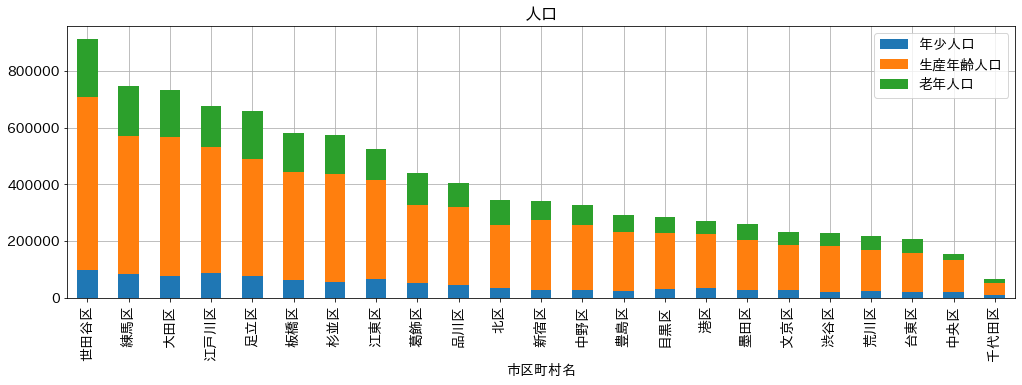

In [21]:
draw_stacked_bar_graph_by_city(
    df_tokyo_edu_pop.sort_values('総人口', ascending=False)[['市区町村名', '年少人口', '生産年齢人口', '老年人口']], '人口'
)

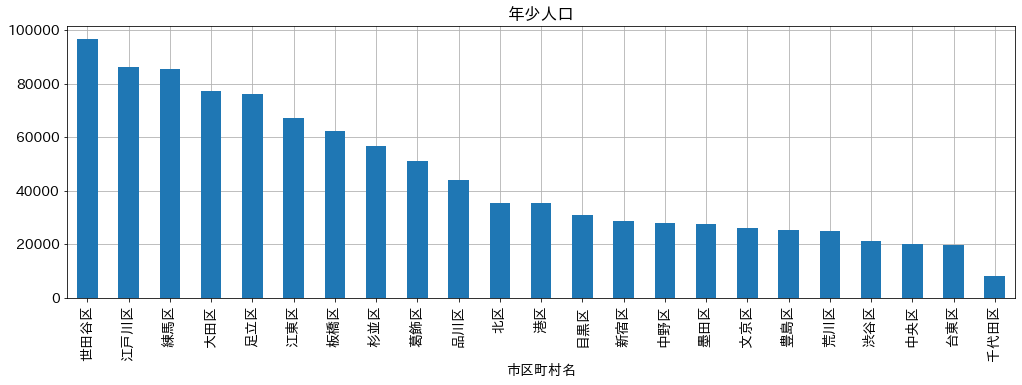

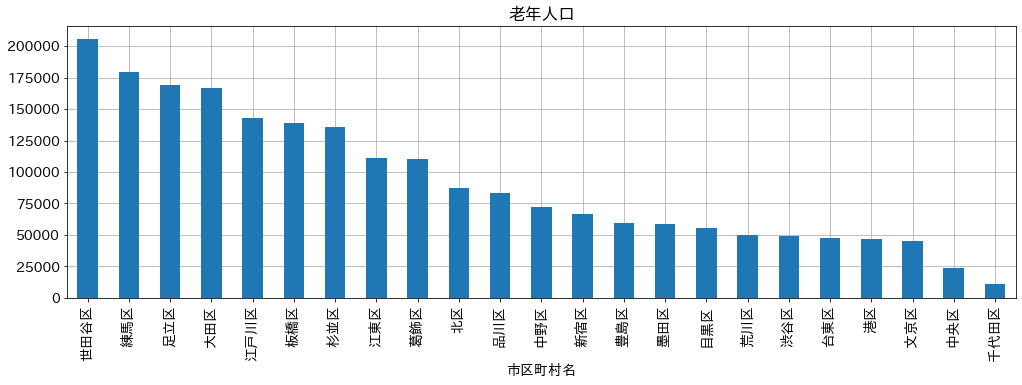

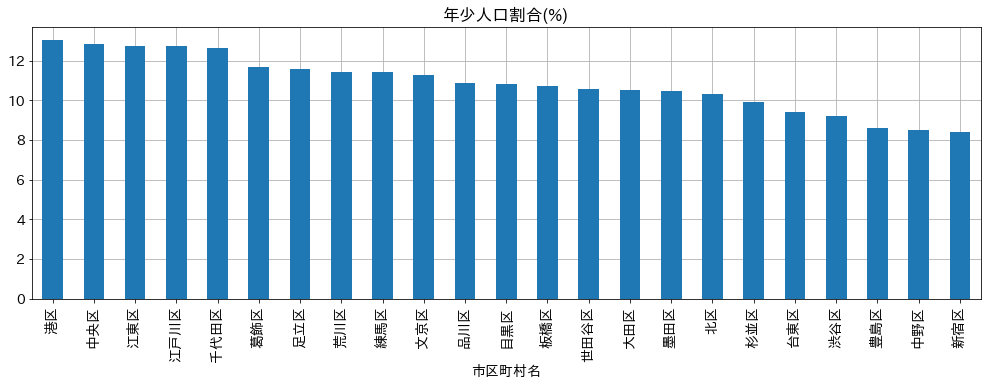

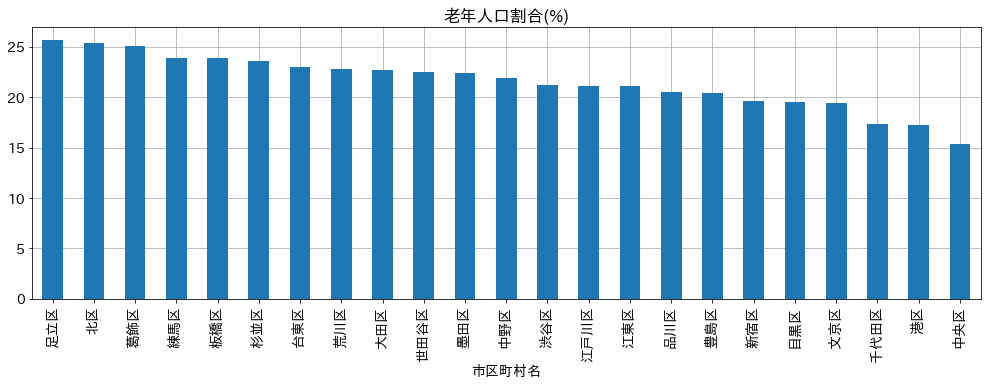

In [22]:
for col in ['年少人口', '老年人口', '年少人口割合(%)', '老年人口割合(%)']:
    draw_bar_graph_by_city(df_tokyo_edu_pop, col)

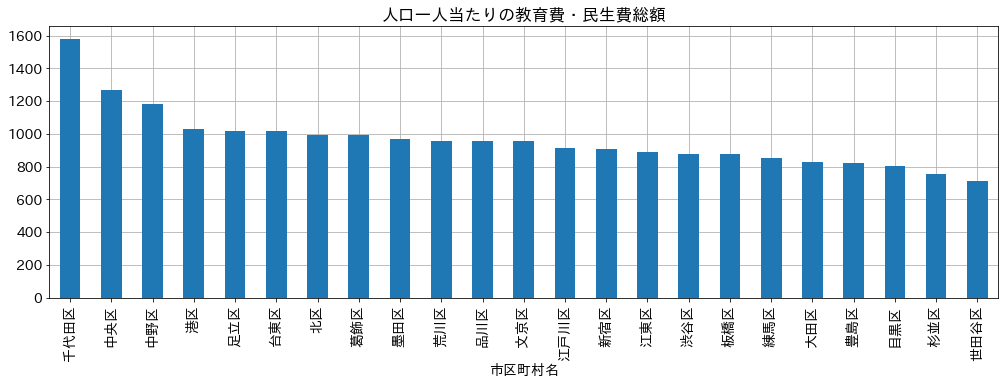

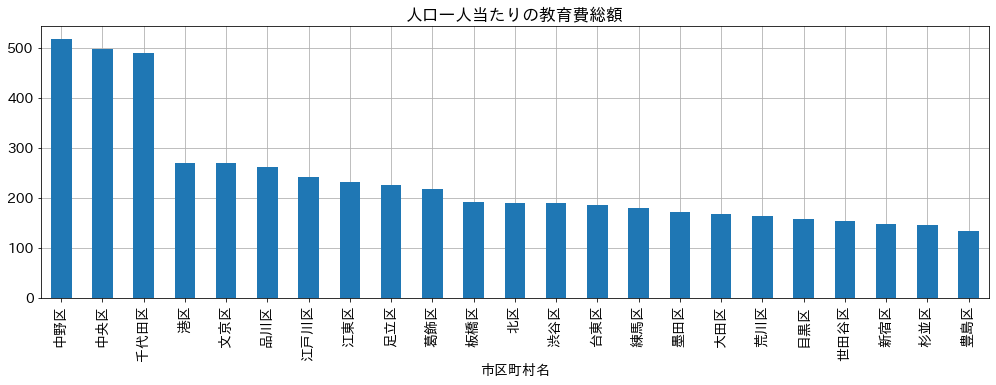

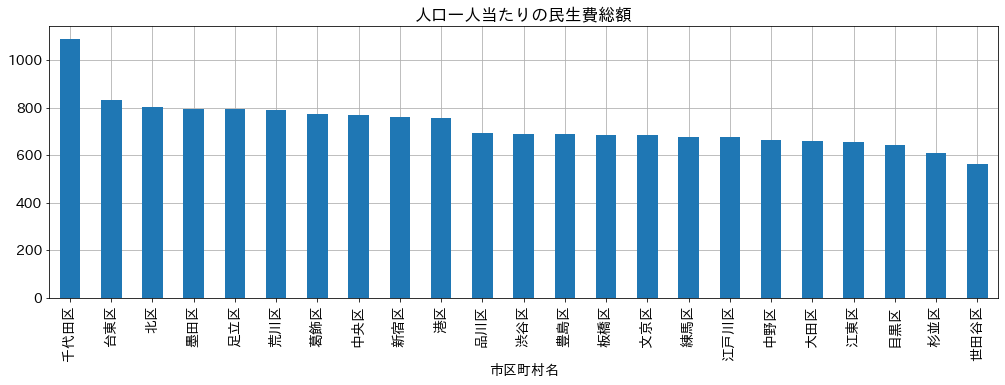

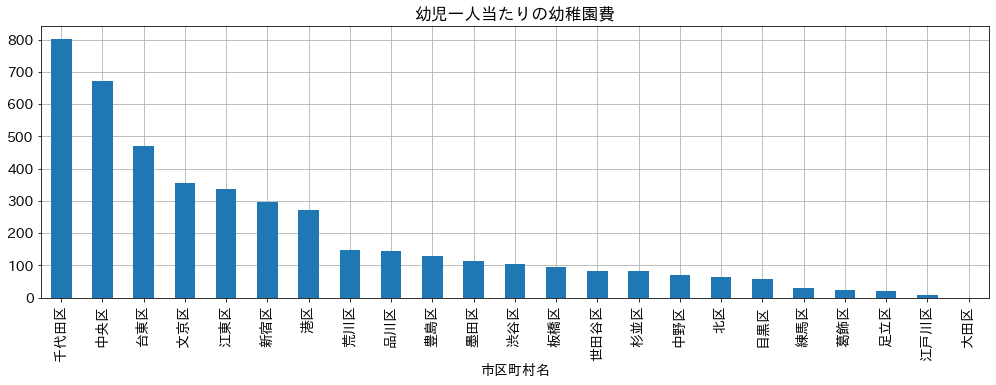

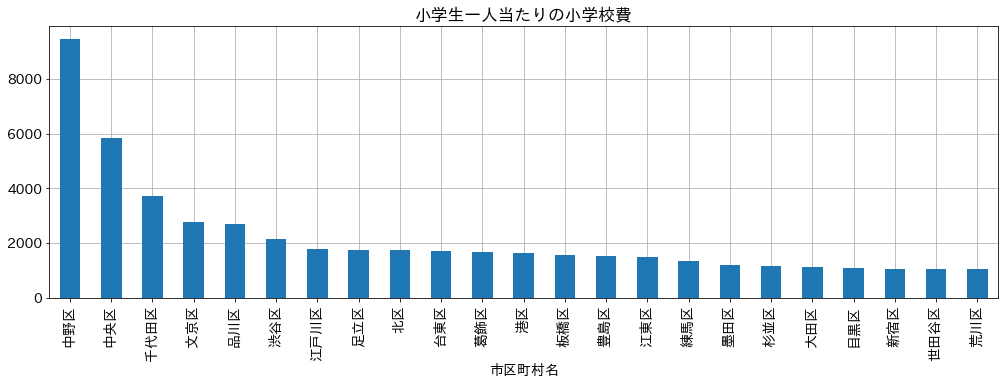

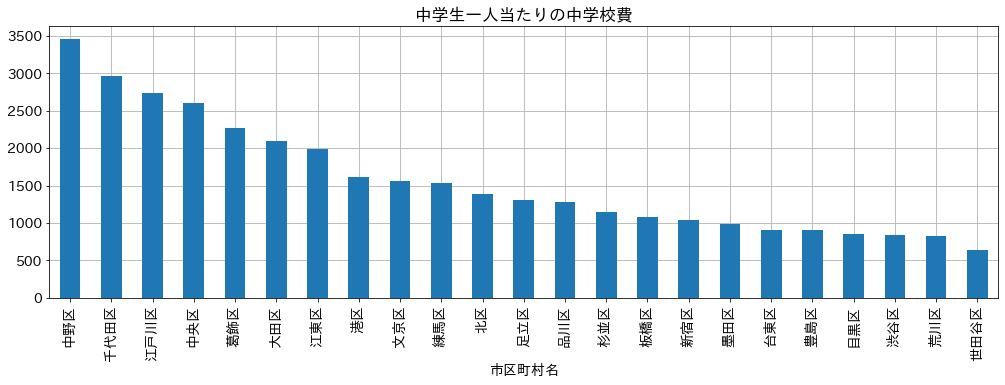

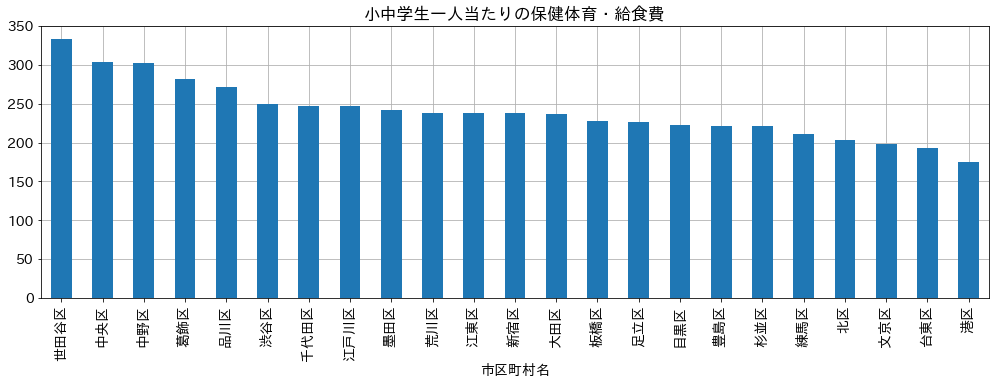

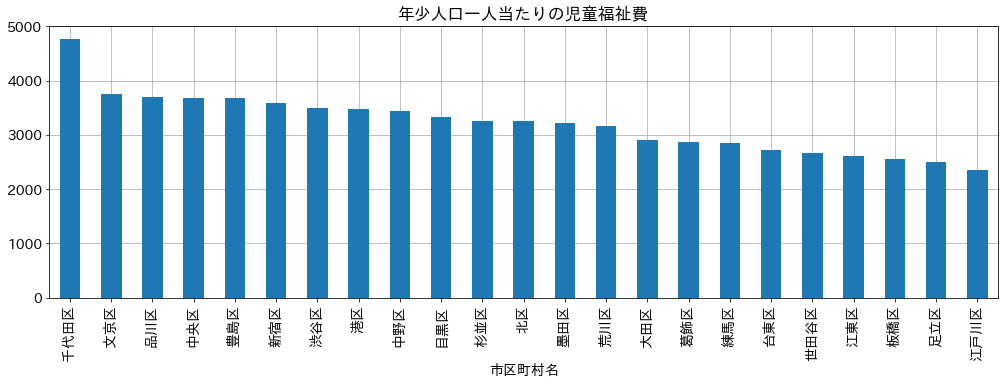

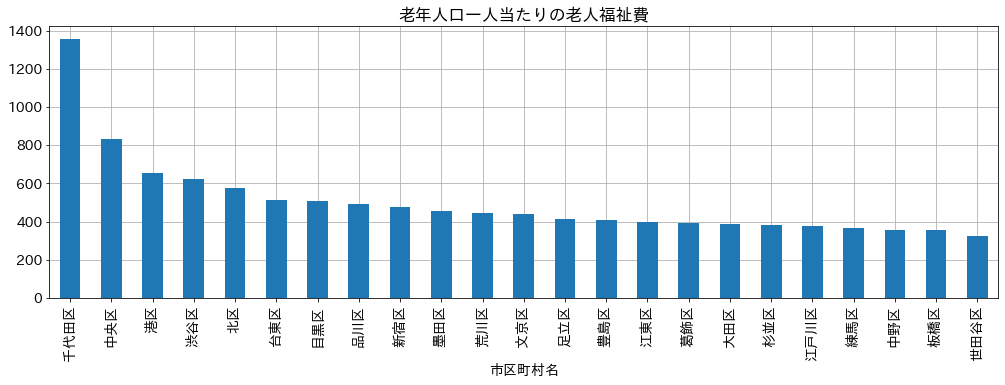

In [23]:
view_columns = [col for col in list(df_tokyo_edu_pop.columns) if '一人当たり' in col]
for col in view_columns:
    draw_bar_graph_by_city(df_tokyo_edu_pop, col)